In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
import warnings, string
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [4]:
df = pd.read_csv('/content/fake reviews dataset1.csv')
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [5]:
df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [7]:
df.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [8]:
df['rating'].value_counts()

5.0    24559
4.0     7965
3.0     3786
1.0     2155
2.0     1967
Name: rating, dtype: int64

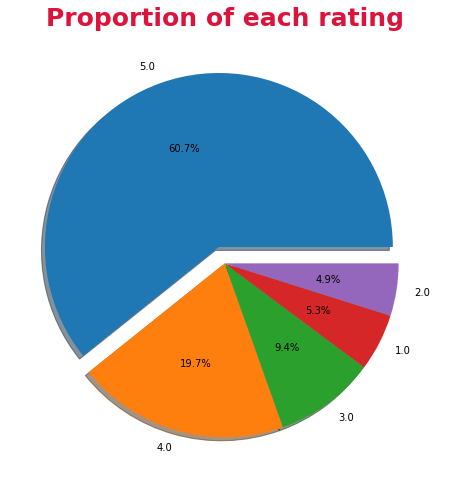

In [9]:
plt.figure(figsize=(15,8))
labels = df['rating'].value_counts().keys()
values = df['rating'].value_counts().values
explode = (0.1,0,0,0,0)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Proportion of each rating',fontweight='bold',fontsize=25,pad=20,color='crimson')
plt.show()

In [10]:
def clean_text(text):
    nopunc = [w for w in text if w not in string.punctuation]
    nopunc = ''.join(nopunc)
    return  ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
df['text_'][0], clean_text(df['text_'][0])

('Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty',
 'Love Well made sturdy comfortable love itVery pretty')

In [13]:
df['text_'].head().apply(clean_text)

0    Love Well made sturdy comfortable love itVery ...
1    love great upgrade original Ive mine couple years
2              pillow saved back love look feel pillow
3          Missing information use great product price
4                 nice set Good quality set two months
Name: text_, dtype: object

In [14]:
df.shape

(40432, 4)

In [15]:
df['text_'] = df['text_'].apply(clean_text)

In [16]:
df['text_'] = df['text_'].astype(str)

In [17]:
def preprocess(text):
    return ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit() and word not in string.punctuation])

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
preprocess(df['text_'][4])

'nice set Good quality set two months'

In [20]:
df['text_'][:10000] = df['text_'][:10000].apply(preprocess)

In [21]:
df['text_'][10001:20000] = df['text_'][10001:20000].apply(preprocess)

In [22]:
df['text_'][20001:30000] = df['text_'][20001:30000].apply(preprocess)

In [23]:
df['text_'][30001:40000] = df['text_'][30001:40000].apply(preprocess)

In [24]:
df['text_'][40001:40432] = df['text_'][40001:40432].apply(preprocess)

In [25]:
df['text_'] = df['text_'].str.lower()

In [26]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df["text_"] = df["text_"].apply(lambda text: lemmatize_words(text))

In [27]:
df['text_'].head()

0    love well made sturdy comfortable love itvery ...
1     love great upgrade original ive mine couple year
2              pillow saved back love look feel pillow
3          missing information use great product price
4                  nice set good quality set two month
Name: text_, dtype: object

In [28]:
df.to_csv('Preprocessed Fake Reviews Detection Dataset.csv')

In [29]:
df = pd.read_csv('Preprocessed Fake Reviews Detection Dataset.csv')
df.head()

,Unnamed: 0,category,rating,label,text_
0,0,Home_and_Kitchen_5,5.0,CG,love well made sturdy comfortable love itvery ...
1,1,Home_and_Kitchen_5,5.0,CG,love great upgrade original ive mine couple year
2,2,Home_and_Kitchen_5,5.0,CG,pillow saved back love look feel pillow
3,3,Home_and_Kitchen_5,1.0,CG,missing information use great product price
4,4,Home_and_Kitchen_5,5.0,CG,nice set good quality set two month


In [30]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [31]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,love well made sturdy comfortable love itvery ...
1,Home_and_Kitchen_5,5.0,CG,love great upgrade original ive mine couple year
2,Home_and_Kitchen_5,5.0,CG,pillow saved back love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,missing information use great product price
4,Home_and_Kitchen_5,5.0,CG,nice set good quality set two month


In [32]:
df.dropna(inplace=True)

In [33]:
df['length'] = df['text_'].apply(len)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40431 entries, 0 to 40431
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40431 non-null  object 
 1   rating    40431 non-null  float64
 2   label     40431 non-null  object 
 3   text_     40431 non-null  object 
 4   length    40431 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.9+ MB


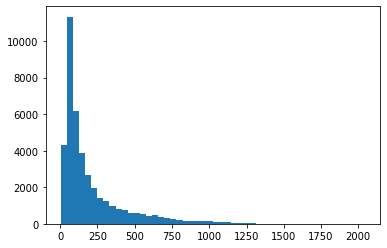

In [35]:
plt.hist(df['length'],bins=50)
plt.show()

In [36]:
df.groupby('label').describe()

rating                                                length  \
         count      mean       std  min  25%  50%  75%  max    count   
label                                                                  
CG     20215.0  4.259906  1.141092  1.0  4.0  5.0  5.0  5.0  20215.0   
OR     20216.0  4.253265  1.147652  1.0  4.0  5.0  5.0  5.0  20216.0   

                                                                
             mean         std  min   25%    50%    75%     max  
label                                                           
CG     166.605491  168.301916  4.0  55.0   95.0  207.0  1246.0  
OR     241.127869  257.954862  8.0  74.0  135.0  299.0  2046.0

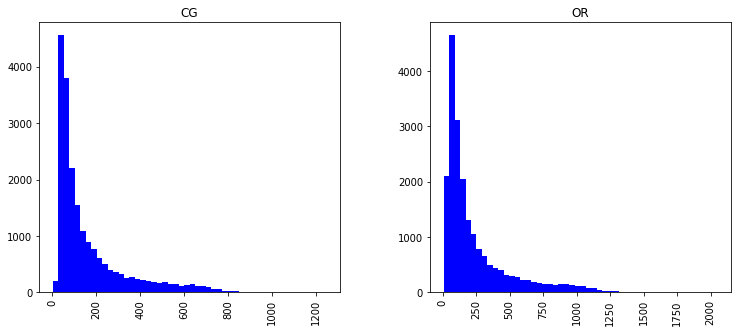

In [37]:
df.hist(column='length',by='label',bins=50,color='blue',figsize=(12,5))
plt.show()

In [38]:
df[df['label']=='OR'][['text_','length']].sort_values(by='length',ascending=False).head().iloc[0].text_

'weak current science seeing twice agree much positive five star review respect read review ill repeat everything like presentation found goofy oversize earring hairdo facial hair arrangement daniel vitalis described wild food expert distracting ugh ditto david wolfe extremely goofy wild hairdo hand jon gabriel described author weight loss expert nicely groomed good presenter story personal transformation fellow pound whew becoming jock normal weight inspiring christiane northrup preserve rank one america cutest doctor really nice looking woman presentation dr mercola jason vale kris carr alejandro junger fine disappointing jamie oliver popular uk give baby cow growth fluid pas unscientific popular idea milk none presenter anything zilch say work doctor colin campbell milk body bad good see presenter take stand sugar agreed evil sugar refined carbohydrate respect dr northrup fat make fat sugar statement pas muster community expert recognizing evil sugar mutually exclusive recognizing p

In [39]:
df.length.describe()

count    40431.000000
mean       203.867602
std        220.954414
min          4.000000
25%         62.000000
50%        114.000000
75%        250.000000
max       2046.000000
Name: length, dtype: float64

In [40]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [41]:
bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x7f80bbc60310>)

In [42]:
bow_transformer.fit(df['text_'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

Total Vocabulary: 45299


In [43]:
review4 = df['text_'][3]
review4

'missing information use great product price'

In [44]:
bow_msg4 = bow_transformer.transform([review4])
print(bow_msg4)
print(bow_msg4.shape)

  (0, 17458)	1
  (0, 20558)	1
  (0, 25812)	1
  (0, 31009)	1
  (0, 31187)	1
  (0, 42475)	1
(1, 45299)


In [46]:
print(bow_transformer.get_feature_names()[17458])
print(bow_transformer.get_feature_names()[25812])

AttributeError: ignored

In [48]:
bow_reviews = bow_transformer.transform(df['text_'])

In [49]:
print("Shape of Bag of Words Transformer for the entire reviews corpus:",bow_reviews.shape)
print("Amount of non zero values in the bag of words model:",bow_reviews.nnz)

Shape of Bag of Words Transformer for the entire reviews corpus: (40431, 45299)
Amount of non zero values in the bag of words model: 1028729


In [50]:
print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

Sparsity: 0.06


In [51]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_rev4 = tfidf_transformer.transform(bow_msg4)
print(bow_msg4)

  (0, 17458)	1
  (0, 20558)	1
  (0, 25812)	1
  (0, 31009)	1
  (0, 31187)	1
  (0, 42475)	1


In [52]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['mango']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['book']])

10.91422964906803
2.8238273524747095


In [53]:
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape:",tfidf_reviews.shape)
print("No. of Dimensions:",tfidf_reviews.ndim)

Shape: (40431, 45299)
No. of Dimensions: 2


In [54]:
review_train, review_test, label_train, label_test = train_test_split(df['text_'],df['label'],test_size=0.35)

In [55]:
pipeline1 = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [56]:
pipeline1.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f80bbc60310>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [57]:
pickle.dump(pipeline1,open('model1.pkl','wb'))

In [58]:
predictions = pipeline1.predict(review_test)
predictions

array(['CG', 'CG', 'OR', ..., 'CG', 'CG', 'CG'], dtype='<U2')

In [59]:
print('Classification Report:',classification_report(label_test,predictions))
print('Confusion Matrix:',confusion_matrix(label_test,predictions))
print('Accuracy Score:',accuracy_score(label_test,predictions))

Classification Report:               precision    recall  f1-score   support

          CG       0.82      0.90      0.86      7087
          OR       0.89      0.81      0.85      7064

    accuracy                           0.85     14151
   macro avg       0.86      0.85      0.85     14151
weighted avg       0.86      0.85      0.85     14151

Confusion Matrix: [[6377  710]
 [1373 5691]]
Accuracy Score: 0.8528019221256449


In [60]:
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Model Prediction Accuracy: 85.28%


In [61]:
pipeline2 = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [62]:
pipeline2.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f80bbc60310>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [63]:
pickle.dump(pipeline2,open('model2.pkl','wb'))

In [64]:
rfc_pred = pipeline2.predict(review_test)
rfc_pred

array(['CG', 'CG', 'OR', ..., 'CG', 'CG', 'CG'], dtype=object)

In [65]:
print('Classification Report:',classification_report(label_test,rfc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,rfc_pred))
print('Accuracy Score:',accuracy_score(label_test,rfc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.82      0.89      0.86      7087
          OR       0.88      0.81      0.84      7064

    accuracy                           0.85     14151
   macro avg       0.85      0.85      0.85     14151
weighted avg       0.85      0.85      0.85     14151

Confusion Matrix: [[6294  793]
 [1339 5725]]
Accuracy Score: 0.8493392693095895
Model Prediction Accuracy: 84.93%


In [66]:
pipeline3 = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])

In [67]:
pipeline3.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f80bbc60310>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [68]:
pickle.dump(pipeline3,open('model3.pkl','wb'))

In [69]:
svc_pred = pipeline3.predict(review_test)
svc_pred

array(['CG', 'CG', 'CG', ..., 'CG', 'CG', 'CG'], dtype=object)

In [70]:
print('Classification Report:',classification_report(label_test,svc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,svc_pred))
print('Accuracy Score:',accuracy_score(label_test,svc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.90      0.87      0.89      7087
          OR       0.87      0.91      0.89      7064

    accuracy                           0.89     14151
   macro avg       0.89      0.89      0.89     14151
weighted avg       0.89      0.89      0.89     14151

Confusion Matrix: [[6146  941]
 [ 647 6417]]
Accuracy Score: 0.8877817822062045
Model Prediction Accuracy: 88.78%


In [71]:
print('Performance of various ML models:')
print('\n')
print('Random Forests Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')
print('Support Vector Machines Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')
print('Multinomial Naive Bayes Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Performance of various ML models:


Random Forests Classifier Prediction Accuracy: 84.93%
Support Vector Machines Prediction Accuracy: 88.78%
Multinomial Naive Bayes Prediction Accuracy: 85.28%
